In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("customer_journey.csv")

df.head()


,SessionID,UserID,Timestamp,PageType,DeviceType,Country,ReferralSource,TimeOnPage_seconds,ItemsInCart,Purchased
0,session_0,user_2223,2025-01-20 22:53:34,home,Desktop,India,Social Media,55,0,0
1,session_1,user_2192,2025-02-26 12:57:10,home,Tablet,Germany,Email,99,0,0
2,session_1,user_2192,2025-02-26 12:59:11,product_page,Tablet,Germany,Email,121,0,0
3,session_2,user_1708,2025-06-24 15:40:46,home,Mobile,India,Google,160,0,0
4,session_3,user_2976,2025-06-11 07:21:02,home,Tablet,UK,Google,113,0,0


In [2]:
ab_df = df[df['DeviceType'].isin(['Desktop', 'Mobile'])]

control = ab_df[ab_df['DeviceType'] == 'Desktop']['Purchased']
test = ab_df[ab_df['DeviceType'] == 'Mobile']['Purchased']

print("Control size:", len(control))
print("Test size:", len(test))


Control size: 4240
Test size: 4256


In [4]:
control_rate = control.mean()
test_rate = test.mean()

print("Desktop conversion:", control_rate)
print("Mobile conversion:", test_rate)



Desktop conversion: 0.39976415094339623
Mobile conversion: 0.39591165413533835


In [5]:
t_stat, p_value = stats.ttest_ind(test, control)

print("T-statistic:", t_stat)
print("P-value:", p_value)


T-statistic: -0.36271197912207076
P-value: 0.7168290749234464


In [6]:
alpha = 0.05

if p_value < alpha:
    print("Significant difference detected")
else:
    print("No significant difference")


No significant difference


In [7]:
diff = test_rate - control_rate

std_error = np.sqrt(
    test_rate*(1-test_rate)/len(test) +
    control_rate*(1-control_rate)/len(control)
)

ci_low = diff - 1.96 * std_error
ci_high = diff + 1.96 * std_error

print("Difference:", diff)
print("95% CI:", (ci_low, ci_high))


Difference: -0.0038524968080578814
95% CI: (np.float64(-0.024667988788957367), np.float64(0.016962995172841604))


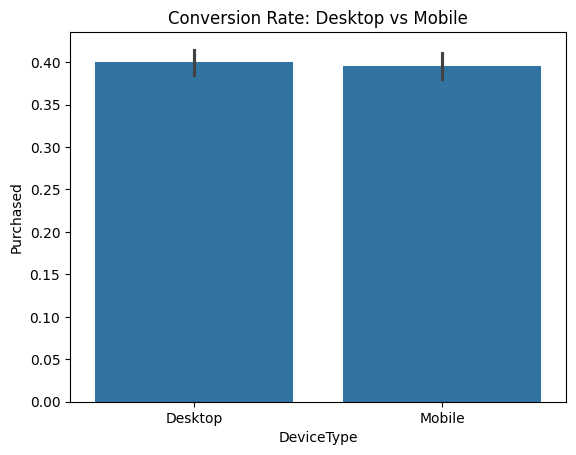

In [8]:
sns.barplot(x='DeviceType', y='Purchased', data=ab_df)
plt.title("Conversion Rate: Desktop vs Mobile")
plt.show()


In [9]:
summary = pd.DataFrame({
    "metric": ["desktop_rate", "mobile_rate", "difference", "p_value"],
    "value": [control_rate, test_rate, diff, p_value]
})

summary.to_csv("ab_test_summary.csv", index=False)
